In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
# Load the dataset and preprocess as needed
df = pd.read_csv("mail_data.csv")
X = df['Message']
y = df['Category']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [3]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classification model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [4]:
# Make predictions on the test set probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

In [5]:
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='spam')
roc_auc = auc(fpr, tpr)

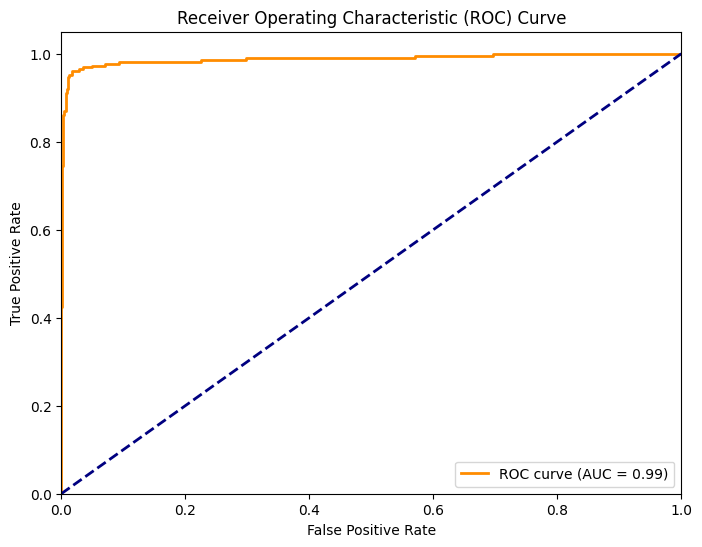

In [6]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [7]:
# Print the AUC value
print(f"AUC: {roc_auc * 100:.2f}")

AUC: 98.94


In [8]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')


print(f"Accuracy: {accuracy * 100 :.2f}")
print(f"Precision: {precision * 100 :.2f}")
print(f"Recall: {recall * 100 :.2f}")
print(f"F1-Score: {f1 * 100 :.2f}")

Accuracy: 96.35
Precision: 98.80
Recall: 73.66
F1-Score: 84.40


In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1446    2]
 [  59  165]]


In [10]:
# Perform k-Fold Cross-Validation
k = 5
model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

# Calculate and report the mean and standard deviation of the accuracy
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")

Mean Accuracy: 0.96
Standard Deviation of Accuracy: 0.00
